##HW2 Ex. 1

Data input

In [43]:
import numpy as np
import pandas as pd

initial_price = 60
b = 40
q = 10
r = 0.05
u = 1.4
d = 1 / u
years = 9
num_of_sim = 3000

**a)** We calculate a risk-neutral probability

In [44]:
p = (1 + r - d) / (u - d)
p

0.4895833333333334

We use the following formula to generate the price. X is a random variable that we get from rand() function.

$P_{t+1} = \begin{cases} u \cdot P_t & \text{if } X \leq p \\ d \cdot P_t &\text{if } X > p \end{cases} $

In [45]:
price_paths = np.zeros((years + 1, num_of_sim))
price_paths[0] = initial_price

for t in range(1, years + 1):
    random_values = np.random.rand(num_of_sim)
    price_paths[t] = np.where(random_values <= p, price_paths[t - 1] * u, price_paths[t - 1] * d)
price_paths

array([[ 60.        ,  60.        ,  60.        , ...,  60.        ,
         60.        ,  60.        ],
       [ 42.85714286,  42.85714286,  84.        , ...,  84.        ,
         84.        ,  42.85714286],
       [ 60.        ,  60.        , 117.6       , ..., 117.6       ,
        117.6       ,  60.        ],
       ...,
       [ 84.        ,  42.85714286,  84.        , ...,  84.        ,
         84.        , 322.6944    ],
       [117.6       ,  30.6122449 , 117.6       , ...,  60.        ,
         60.        , 230.496     ],
       [ 84.        ,  21.86588921, 164.64      , ...,  42.85714286,
         84.        , 322.6944    ]])

Calculate cashflows and get the answer for **b)**

In [46]:
cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (initial_price-b)*q
for t in range(1, years+1):
    cash_flows[t] = (price_paths[t] - b) * q / (1 + r) ** t
cash_flows

array([[ 200.        ,  200.        ,  200.        , ...,  200.        ,
         200.        ,  200.        ],
       [  27.21088435,   27.21088435,  419.04761905, ...,  419.04761905,
         419.04761905,   27.21088435],
       [ 181.40589569,  181.40589569,  703.85487528, ...,  703.85487528,
         703.85487528,  181.40589569],
       ...,
       [ 312.69978526,   20.30518086,  312.69978526, ...,  312.69978526,
         312.69978526, 2009.05632212],
       [ 525.22734493,  -63.54002174,  525.22734493, ...,  135.36787241,
         135.36787241, 1289.35191109],
       [ 283.62792314, -116.89409501,  803.44055317, ...,   18.41739761,
         283.62792314, 1822.27330805]])

In [47]:
PV_of_cashflows_b = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_b:.2f}")

Expected Present Value of Cash Flows: $2677.94


**c)** Now we add np.maximum function to add flexibility.

In [49]:
cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (initial_price-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_c = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_c:.2f}")

Expected Present Value of Cash Flows: $2952.69


Out expected cashflows became bigger than in the b) part which is to be expected as now we eliminate all possible negative outcomes so out cashflows are either 0 or positive.

**d)** Now we change the q parametr to calculate how our cashflows will change in response to investment

In [50]:
q = 20

In [51]:
cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (initial_price-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_d = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_d:.2f}")

Expected Present Value of Cash Flows: $5905.39


It's worthwile to do the expansion if cashflows in case of investment (including the negative I) are higher than CF's in c)

-I + PV_of_cashflows_d >= PV_of_cashflows_c

I <=  PV_of_cashflows_d - PV_of_cashflows_c

In [52]:
print("I should be smaller than", round(PV_of_cashflows_d - PV_of_cashflows_c))

I should be smaller than 2953


**e)** First, let's draw the tree with prices in periods 0, 1 and 2.

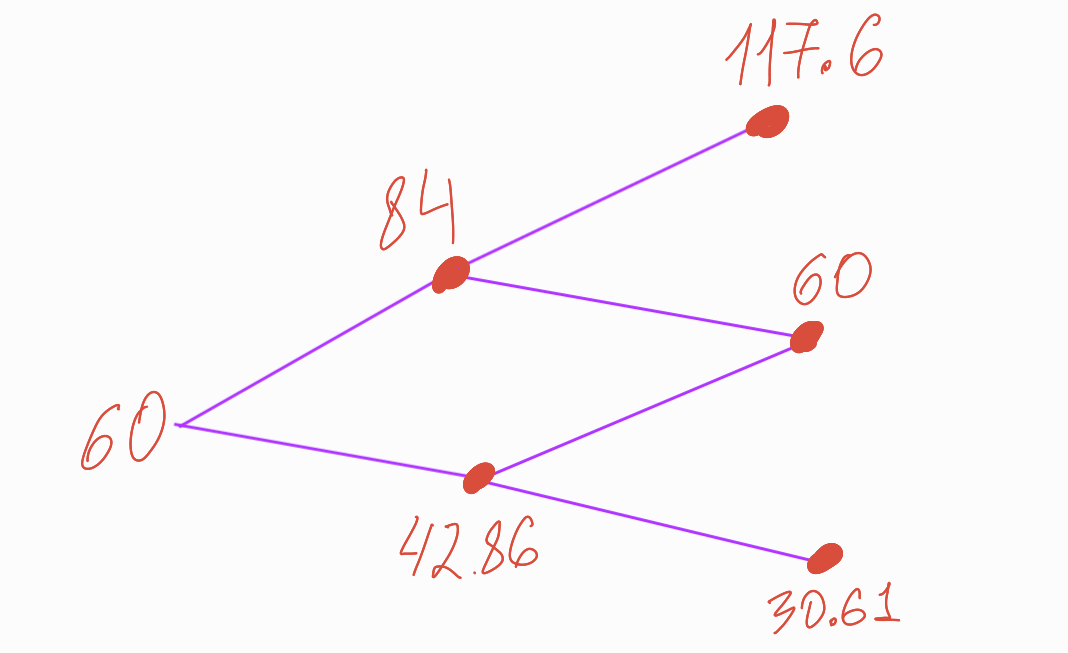

Let's see what cashflows we get in t=1 and after that if we invest in the upper node.

In [76]:
years = 8
price_paths = np.zeros((years + 1, num_of_sim))
q=20
price_paths[0] = 60*1.4

for t in range(1, years + 1):
    random_values = np.random.rand(num_of_sim)
    price_paths[t] = np.where(random_values <= p, price_paths[t - 1] * u, price_paths[t - 1] * d)
price_paths

array([[ 84.        ,  84.        ,  84.        , ...,  84.        ,
         84.        ,  84.        ],
       [ 60.        ,  60.        , 117.6       , ...,  60.        ,
         60.        ,  60.        ],
       [ 84.        ,  84.        , 164.64      , ...,  42.85714286,
         84.        ,  84.        ],
       ...,
       [ 84.        ,  42.85714286, 164.64      , ...,  42.85714286,
        164.64      ,  42.85714286],
       [ 60.        ,  30.6122449 , 117.6       , ...,  30.6122449 ,
        230.496     ,  30.6122449 ],
       [ 42.85714286,  21.86588921,  84.        , ...,  42.85714286,
        322.6944    ,  21.86588921]])

In [77]:
cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (60*1.4-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_d = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_d:.2f}")

Expected Present Value of Cash Flows: $9095.57


Let's see what cashflows we get in t=1 in the lower node if we invest.

In [78]:
years = 8
price_paths = np.zeros((years + 1, num_of_sim))
q=20
price_paths[0] = 60/1.4

for t in range(1, years + 1):
    random_values = np.random.rand(num_of_sim)
    price_paths[t] = np.where(random_values <= p, price_paths[t - 1] * u, price_paths[t - 1] * d)

cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (60/1.4-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_d = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_d:.2f}")

Expected Present Value of Cash Flows: $2741.31


Let's see what cashflows we get in t=2 in the upper-upper node if we invest.

In [80]:
years = 7
price_paths = np.zeros((years + 1, num_of_sim))
q=20
price_paths[0] = 60*1.4*1.4

for t in range(1, years + 1):
    random_values = np.random.rand(num_of_sim)
    price_paths[t] = np.where(random_values <= p, price_paths[t - 1] * u, price_paths[t - 1] * d)

cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (60*1.4*1.4-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_d = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_d:.2f}")

Expected Present Value of Cash Flows: $13729.53


Let's see what cashflows we get in t=2 in the upper-lower node if we invest.

In [81]:
years = 7
price_paths = np.zeros((years + 1, num_of_sim))
q=20
price_paths[0] = 60

for t in range(1, years + 1):
    random_values = np.random.rand(num_of_sim)
    price_paths[t] = np.where(random_values <= p, price_paths[t - 1] * u, price_paths[t - 1] * d)

cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (60-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_d = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_d:.2f}")

Expected Present Value of Cash Flows: $4479.23


Let's see what cashflows we get in t=2 in the lower-lower node if we invest.

In [85]:
years = 7
price_paths = np.zeros((years + 1, num_of_sim))
q=20
price_paths[0] = 60/1.4/1.4

for t in range(1, years + 1):
    random_values = np.random.rand(num_of_sim)
    price_paths[t] = np.where(random_values <= p, price_paths[t - 1] * u, price_paths[t - 1] * d)

cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (60/1.4/1.4-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_d = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_d:.2f}")

Expected Present Value of Cash Flows: $821.20


We got the following cashflows from our decision to invest
*   Investment in t=0, $NPV = -I + 5905.39$
*   Investment in t=1 upper node, $NPV = 0.5*\frac{-I+9095.57}{1.05}$
*   Investment in t=1 lower node,  $NPV = 0.5*\frac{-I+2741.31}{1.05}$
*   Investment in t=1 upper-upper node,  $NPV = 0.5^2*\frac{-I+13729.53}{1.05^2}$
*   Investment in t=1 upper-lower and lower-upper node,  $NPV = 0.5^2*\frac{-I+4479.23}{1.05^2}$
*   Investment in t=1 lower-lower node,  $NPV = 0.5^2*\frac{-I+780.67}{1.05^2}$

Wу get bigger returns from ouк decision to invest only if we move upward so we should compare three cases: investment in t=0, t=1 up, t=2 up-up.

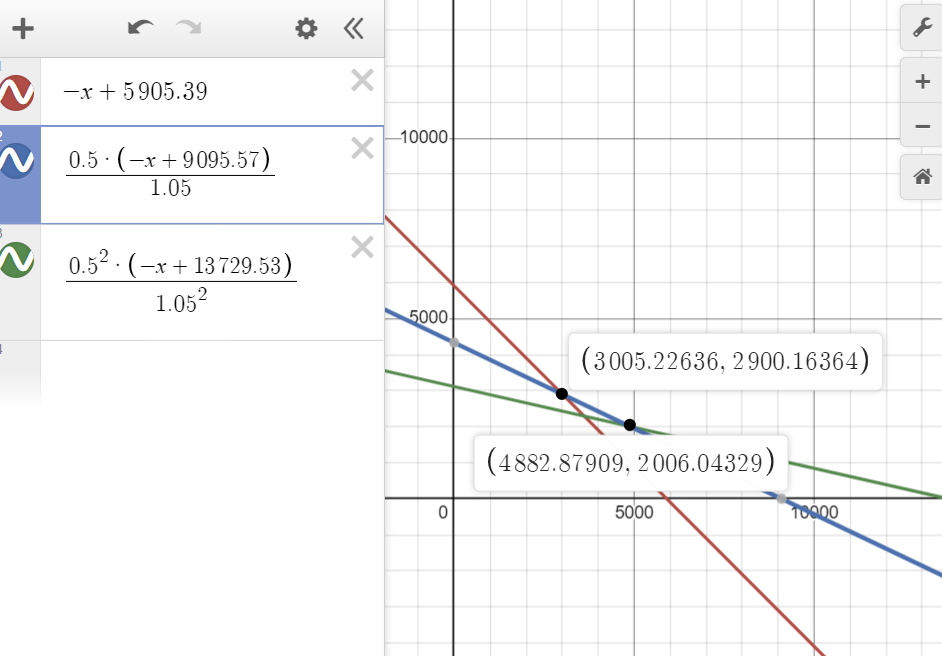

The answer is to

Invest in t=0 if I < 3005

Invest in t=1 up if 3005 < I < 4882

Invest in t=2 up-up if I > 4882